Data Link : [https://www.libreview.com/glucosereports](https://www.libreview.com/glucosereports)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_theme();
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
files = [x for x in os.listdir('../data/') if x.endswith('.csv')]
dates = [datetime.strptime(x.replace('.csv','').split('_')[-1],'%m-%d-%Y') for x in files]
recent_file = files[np.argmax(np.array(dates, dtype='datetime64'))]

print(f'Most recent file : {recent_file}')

Most recent file : VivekAithal_glucose_8-29-2021.csv


In [7]:
df = pd.read_csv(f'../data/{recent_file}', skiprows=1)
df = df[df['Device']=='FreeStyle Libre 2'].filter(['Device Timestamp','Historic Glucose mg/dL']).dropna()
df.columns = ['time','val']
df['time'] = pd.to_datetime(df['time'])
df['min'] = df['time'].dt.minute
df['hour'] = df['time'].dt.hour
df['t'] = df['hour'] + df['min']/60.0
df['date'] = df['time'].dt.date.astype(str)
df = df.drop_duplicates()
df

,time,val,min,hour,t,date
3,2021-08-16 19:33:00,84.0,33,19,19.550000,2021-08-16
4,2021-08-16 19:48:00,83.0,48,19,19.800000,2021-08-16
5,2021-08-16 20:04:00,96.0,4,20,20.066667,2021-08-16
6,2021-08-16 20:19:00,104.0,19,20,20.316667,2021-08-16
7,2021-08-16 20:34:00,98.0,34,20,20.566667,2021-08-16
...,...,...,...,...,...,...
862,2021-08-25 18:44:00,64.0,44,18,18.733333,2021-08-25
863,2021-08-25 18:59:00,65.0,59,18,18.983333,2021-08-25
864,2021-08-25 19:15:00,62.0,15,19,19.250000,2021-08-25
865,2021-08-25 19:30:00,61.0,30,19,19.500000,2021-08-25


[]

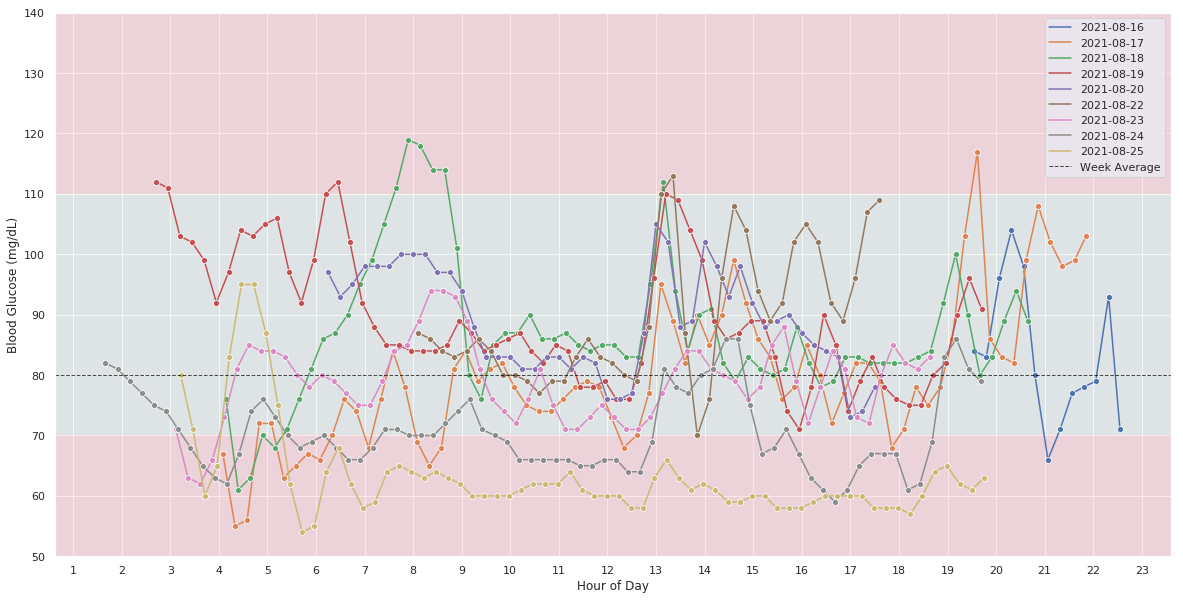

In [8]:
plot = sns.lineplot(data=df, x="t", y="val", hue="date", marker="o")

# plot.axes.axhline(y = 70, color='black', linewidth=1, alpha=.7, ls="--")
# plot.axes.axhline(y = 110, color='black', linewidth=1, alpha=.7, ls="--")
plot.axes.axhspan(50, 70, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhspan(70, 110, facecolor='green', linewidth=0, alpha=.05)
plot.axes.axhspan(110, 140, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhline(y = df['val'].mean(), color='black', linewidth=1, alpha=.7, ls="--", label="Week Average")

plt.xticks(np.arange(0,24,1))
plt.xlabel("Hour of Day")
plt.ylabel("Blood Glucose (mg/dL)")
plt.ylim(50,140)
plt.legend()
plt.plot()

[]

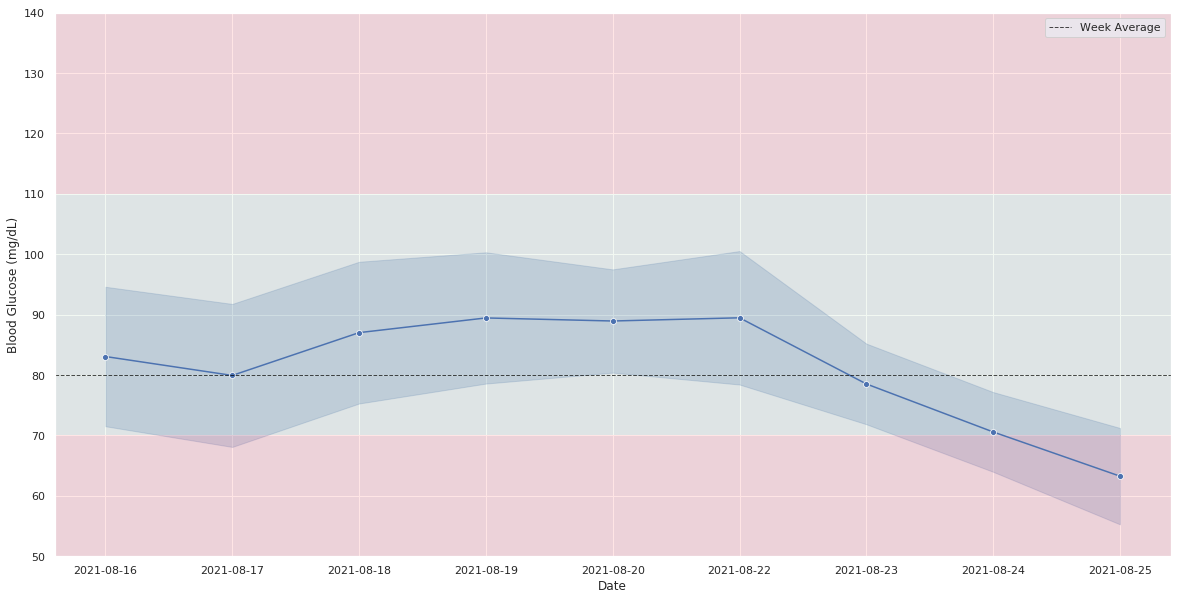

In [9]:
plot = sns.lineplot(data=df, x="date", y="val", marker="o", ci='sd')

# plot.axes.axhline(y = 70, color='black', linewidth=1, alpha=.7, ls="--")
# plot.axes.axhline(y = 110, color='black', linewidth=1, alpha=.7, ls="--")
plot.axes.axhspan(50, 70, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhspan(70, 110, facecolor='green', linewidth=0, alpha=.05)
plot.axes.axhspan(110, 140, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhline(y = df['val'].mean(), color='black', linewidth=1, alpha=.7, ls="--", label="Week Average")

plt.xticks(np.arange(0,24,1))
plt.xlabel("Date")
plt.ylabel("Blood Glucose (mg/dL)")
plt.ylim(50,140)
plt.legend()
plt.plot()

[]

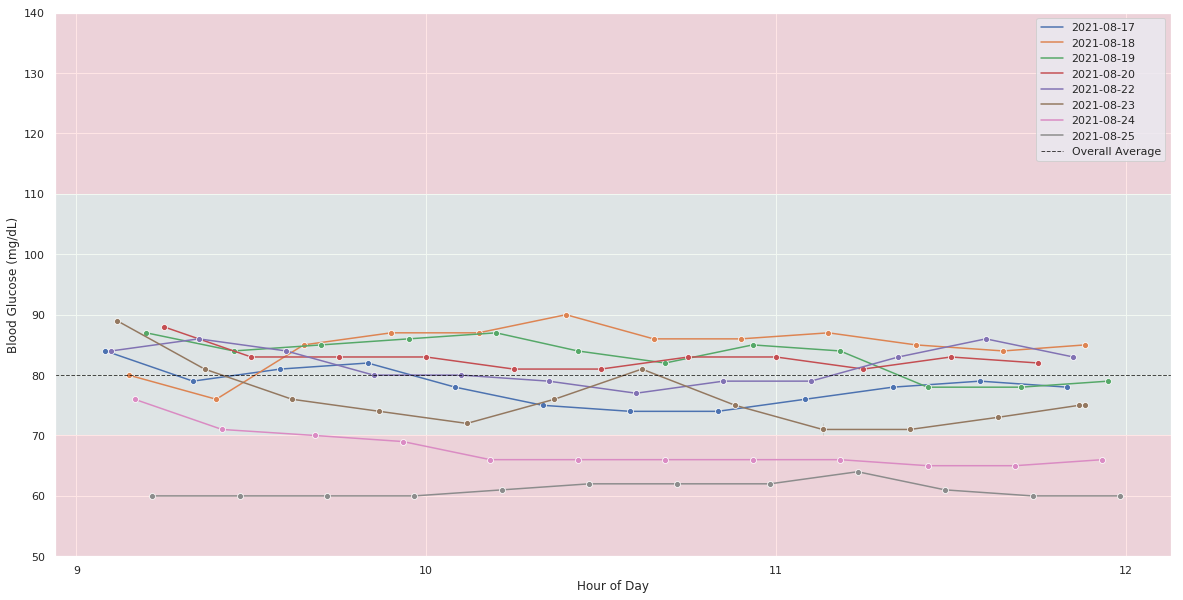

In [10]:
plot = sns.lineplot(data=df[(df['t']>9)&(df['t']<12)], x="t", y="val", hue="date", marker="o")

# plot.axes.axhline(y = 70, color='black', linewidth=1, alpha=.7, ls="--")
# plot.axes.axhline(y = 110, color='black', linewidth=1, alpha=.7, ls="--")
plot.axes.axhspan(50, 70, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhspan(70, 110, facecolor='green', linewidth=0, alpha=.05)
plot.axes.axhspan(110, 140, facecolor='red', linewidth=0, alpha=.1)
plot.axes.axhline(y = df['val'].mean(), color='black', linewidth=1, alpha=.7, ls="--", label="Overall Average")

plt.xticks(np.arange(0,24,1))
plt.xlabel("Hour of Day")
plt.ylabel("Blood Glucose (mg/dL)")
plt.ylim(50,140)
plt.legend()
plt.plot()

In [11]:
def mean_grad(x):
    grad = np.gradient(x)
    return np.mean(np.abs(grad))

k = df[(df['t']>9)&(df['t']<12)].groupby('date').agg({'val':['mean','std','min','max',mean_grad]}).reset_index()
k.columns = ['date','mean','std','min','max','mean_grad']
k['range'] = k['max']-k['min']
k.filter(['date','mean','std','range','mean_grad'])

,date,mean,std,range,mean_grad
0,2021-08-17,78.166667,3.128559,10.0,1.750000
1,2021-08-18,84.833333,3.639014,14.0,1.708333
2,2021-08-19,83.250000,3.278719,9.0,1.583333
3,2021-08-20,82.818182,1.940009,7.0,1.272727
4,2021-08-22,81.666667,3.025147,9.0,1.541667
5,2021-08-23,75.714286,5.014265,19.0,2.892857
6,2021-08-24,67.666667,3.284491,11.0,1.250000
7,2021-08-25,61.000000,1.279204,4.0,0.500000


In [16]:
g_min = 70
g_max = 110

for dt in df['date'].unique():
    x = df[df['date']==dt]['t']
    y = df[df['date']==dt]['val']

    xt = np.arange(0,24,0.001)
    yt = np.interp(xt, x, y, left=np.nan, right=np.nan)
    
    over_max = round(len(yt[yt>=g_max])*100/len(yt),2)
    under_min = round(len(yt[yt<=g_min])*100/len(yt),2)
    print(dt, " | over_max : ",over_max, "under_min : ",under_min)

2021-08-16  | over_max :  0.0 under_min :  1.15
2021-08-17  | over_max :  0.79 under_min :  13.34
2021-08-18  | over_max :  4.9 under_min :  4.44
2021-08-19  | over_max :  2.43 under_min :  0.0
2021-08-20  | over_max :  0.0 under_min :  0.0
2021-08-22  | over_max :  1.16 under_min :  0.0
2021-08-23  | over_max :  0.0 under_min :  3.59
2021-08-24  | over_max :  0.0 under_min :  43.38
2021-08-25  | over_max :  0.0 under_min :  62.44


<ipython-input-16-010978bca1a6>:11: RuntimeWarning: invalid value encountered in greater_equal
  over_max = round(len(yt[yt>=g_max])*100/len(yt),2)
<ipython-input-16-010978bca1a6>:12: RuntimeWarning: invalid value encountered in less_equal
  under_min = round(len(yt[yt<=g_min])*100/len(yt),2)
